In [1]:
import pandas as pd
%matplotlib inline

In [2]:
HiC_chr1=pd.read_csv('/home/alberto/DATA/IMRNZcentoK/chr1.txt',sep='\t',header=None,names=['win1', 'win2', 'contactP'])

In [3]:
HiC_chr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137255 entries, 0 to 2137254
Data columns (total 3 columns):
win1        int64
win2        int64
contactP    float64
dtypes: float64(1), int64(2)
memory usage: 48.9 MB


In [4]:
sortHc=HiC_chr1.set_index(['win1','win2'])

In [5]:
sortHc.sort_index(inplace=True)

In [6]:
sortHc.head()

contactP
win1 win2            
0    0       3.379118
     100000  2.785824
     200000  0.501507
     500000  0.128476
     600000  0.770418

In [7]:
sortHc.contactP.describe()

count    2.137147e+06
mean     1.266949e+00
std      2.397804e+00
min      5.867589e-03
25%      5.980739e-01
50%      1.005880e+00
75%      1.600051e+00
max      1.341511e+03
Name: contactP, dtype: float64

In [8]:
sortHc.reset_index(inplace=True)

In [9]:
sortHc['distance']=sortHc.apply(lambda x: abs(x['win1']-x['win2']),axis=1 )

In [10]:
sortHc.head()

,win1,win2,contactP,distance
0,0,0,3.379118,0.0
1,0,100000,2.785824,100000.0
2,0,200000,0.501507,200000.0
3,0,500000,0.128476,500000.0
4,0,600000,0.770418,600000.0


In [11]:
tempHc=sortHc.rename(columns={'win1':'win2','win2':'win1'})

In [12]:
tempHc.head()

,win2,win1,contactP,distance
0,0,0,3.379118,0.0
1,0,100000,2.785824,100000.0
2,0,200000,0.501507,200000.0
3,0,500000,0.128476,500000.0
4,0,600000,0.770418,600000.0


In [13]:
sortHc[['contactP','distance']].corr()

,contactP,distance
contactP,1.000000,0.042206
distance,0.042206,1.000000


In [14]:
Big=pd.concat([sortHc,tempHc])

In [15]:
Big.nlargest(10,columns='contactP')

,contactP,distance,win1,win2
1616509,1341.51090,62400000.0,144000000,206400000
1616509,1341.51090,62400000.0,206400000,144000000
1605112,916.80304,85300000.0,120700000,206000000
1605112,916.80304,85300000.0,206000000,120700000
1605116,817.51154,85700000.0,120700000,206400000
1605116,817.51154,85700000.0,206400000,120700000
281225,769.60380,129300000.0,16900000,146200000
281225,769.60380,129300000.0,146200000,16900000
279302,688.56440,131900000.0,16800000,148700000
279302,688.56440,131900000.0,148700000,16800000


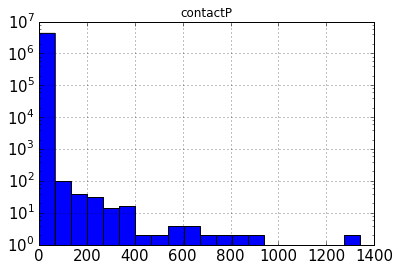

In [154]:
Big.hist(column='contactP',log=True,bins=20,xlabelsize=15,ylabelsize=15);

In [17]:
def openGC(path,resolution):
    import gzip
    def window(ising,lung):
        L=len(ising)

        GCdens=[]
        distances = range((L/lung)+1)
        for i in distances:
            temp=ising[i*lung:(i+1)*lung]

            NP=temp.count('+')
            NM=temp.count('-')
            if NP+NM != 0: 
                NPmed=NP/float(NP+NM)
            else: NPmed = float('nan')
            GCdens.append(NPmed)
        #print len(GCdens)
        return GCdens

    path
    with gzip.open(path, 'rb') as f:
        ising = f.read()

    isingN = '\n'.join(ising.split('\n')[1:])
    ising=isingN.replace('\n','').replace('\r','')
    ising=ising.replace('A','-').replace('T','-').replace('G','+').replace('C','+').replace('a','-').replace('t','-').replace('g','+').replace('c','+')
    #L=len(ising)

    muVec=window(ising,resolution)   #change resolution here
    return muVec

In [233]:
ch1_fa=openGC('/home/alberto/Downloads/HI-C/Reference Genomes/hg19/chr1.fa.gz',10**5)

In [234]:
GC=pd.DataFrame(ch1_fa,columns=['GC_content']).reset_index()

In [235]:
GC.head()

,index,GC_content
0,0,0.424522
1,1,0.436106
2,2,0.391445
3,3,0.402049
4,4,0.453719


In [236]:
GC['index']=GC['index']*10**5

In [237]:
GC.rename(columns ={'index': 'window'},inplace=True)

In [238]:
GC.head()

,window,GC_content
0,0,0.424522
1,100000,0.436106
2,200000,0.391445
3,300000,0.402049
4,400000,0.453719


In [239]:
Big.head()

,contactP,distance,win1,win2
0,3.379118,0.0,0,0
1,2.785824,100000.0,0,100000
2,0.501507,200000.0,0,200000
3,0.128476,500000.0,0,500000
4,0.770418,600000.0,0,600000


In [240]:
Big.drop_duplicates(inplace=True)

In [241]:
sortHc=Big

In [242]:
tmpMerge=pd.merge(sortHc,GC,left_on='win1',right_on='window',left_index=True)

In [243]:
tmpMerge.rename(columns ={'GC_content': 'GC_content1'},inplace=True)

In [244]:
df=pd.merge(tmpMerge,GC,left_on='win2',right_on='window',left_index=True)

In [245]:
df.rename(columns ={'GC_content': 'GC_content2'},inplace=True)

In [246]:
cleanDf=df.drop(['window_x','window_y'], axis=1)

In [247]:
cleanDf['distance']=cleanDf['distance'].astype(int)

In [248]:
cleanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4272232 entries, 0 to 1461
Data columns (total 6 columns):
contactP       float64
distance       int64
win1           int64
win2           int64
GC_content1    float64
GC_content2    float64
dtypes: float64(3), int64(3)
memory usage: 228.2 MB


In [249]:
cleanDf.dropna(inplace=True)

In [250]:
cleanDf['GC_diff']=cleanDf.apply(lambda x: abs(x['GC_content1']-x['GC_content2']),axis=1 )

In [251]:
cleanDf.head()

,contactP,distance,win1,win2,GC_content1,GC_content2,GC_diff
0,3.379118,0,0,0,0.424522,0.424522,0.000000
0,2.785824,100000,100000,0,0.436106,0.424522,0.011584
0,0.501507,200000,200000,0,0.391445,0.424522,0.033078
0,0.128476,500000,500000,0,0.447362,0.424522,0.022840
0,0.770418,600000,600000,0,0.419190,0.424522,0.005332


In [252]:
cleanDf[['distance','contactP','GC_diff']].corr()

,distance,contactP,GC_diff
distance,1.000000,0.042192,0.157444
contactP,0.042192,1.000000,-0.052315
GC_diff,0.157444,-0.052315,1.000000


In [253]:
cleanDf.set_index(['GC_content1','GC_content2']).sort_index().reset_index()

,GC_content1,GC_content2,contactP,distance,win1,win2,GC_diff
0,0.32476,0.32476,0.885960,0,103400000,103400000,0.00000
1,0.32476,0.32939,1.141626,2100000,103400000,105500000,0.00463
2,0.32476,0.32948,0.686064,85600000,103400000,189000000,0.00472
3,0.32476,0.33183,0.671914,87000000,103400000,190400000,0.00707
4,0.32476,0.33287,0.713540,86600000,103400000,190000000,0.00811
5,0.32476,0.33415,0.724011,87300000,103400000,190700000,0.00939
6,0.32476,0.33420,0.940694,5300000,103400000,98100000,0.00944
7,0.32476,0.33453,0.466677,66500000,103400000,169900000,0.00977
8,0.32476,0.33497,0.758425,87200000,103400000,190600000,0.01021
9,0.32476,0.33499,0.681937,86900000,103400000,190300000,0.01023


In [254]:
maskDist=cleanDf[cleanDf.distance>10**6].reset_index()

In [255]:
maskDist.drop(['index'], axis=1,inplace=True)

In [256]:
maskDist

,contactP,distance,win1,win2,GC_content1,GC_content2,GC_diff
0,0.047691,1100000,1100000,0,0.61372,0.424522,0.189198
1,0.104125,1200000,1200000,0,0.63522,0.424522,0.210698
2,0.070274,1700000,1700000,0,0.47190,0.424522,0.047378
3,0.106416,2000000,2000000,0,0.56204,0.424522,0.137518
4,0.188873,3100000,3100000,0,0.56805,0.424522,0.143528
5,0.212228,3400000,3400000,0,0.61924,0.424522,0.194718
6,0.275687,5000000,5000000,0,0.44523,0.424522,0.020708
7,0.313968,5700000,5700000,0,0.49554,0.424522,0.071018
8,0.337961,5800000,5800000,0,0.51265,0.424522,0.088128
9,0.282837,6200000,6200000,0,0.54450,0.424522,0.119978


In [257]:
import numpy as np

In [258]:
ranges=np.linspace(np.nanmin(maskDist.GC_content1),(np.nanmax(maskDist.GC_content1)-.05),26)

In [259]:
space=ranges[1]-ranges[0]

In [260]:
print ranges

[ 0.32476    0.3351784  0.3455968  0.3560152  0.3664336  0.376852
  0.3872704  0.3976888  0.4081072  0.4185256  0.428944   0.4393624
  0.4497808  0.4601992  0.4706176  0.481036   0.4914544  0.5018728
  0.5122912  0.5227096  0.533128   0.5435464  0.5539648  0.5643832
  0.5748016  0.58522  ]


In [261]:
def median_num(group):
    return group.count()*group.mean()

In [262]:
Matrix=maskDist.groupby([pd.cut(maskDist["GC_content1"], ranges),pd.cut(maskDist["GC_content2"], ranges)]).contactP.count()

In [263]:
Matrix=Matrix.reset_index()

In [264]:
Matrix.head()

,GC_content1,GC_content2,contactP
0,"(0.325, 0.335]","(0.325, 0.335]",164
1,"(0.325, 0.335]","(0.335, 0.346]",867
2,"(0.325, 0.335]","(0.346, 0.356]",1094
3,"(0.325, 0.335]","(0.356, 0.366]",1810
4,"(0.325, 0.335]","(0.366, 0.377]",2493


In [265]:
GC_hist=maskDist.GC_content1.append(maskDist.GC_content2,ignore_index=True)

In [266]:
GC_hist.head()

0    0.61372
1    0.63522
2    0.47190
3    0.56204
4    0.56805
dtype: float64

In [267]:
Tot=len(GC_hist)
pro=GC_hist.groupby(pd.cut(GC_hist, ranges)).apply(lambda x: x.count()/float(Tot))

In [268]:
maskDist.head()

,contactP,distance,win1,win2,GC_content1,GC_content2,GC_diff
0,0.047691,1100000,1100000,0,0.61372,0.424522,0.189198
1,0.104125,1200000,1200000,0,0.63522,0.424522,0.210698
2,0.070274,1700000,1700000,0,0.47190,0.424522,0.047378
3,0.106416,2000000,2000000,0,0.56204,0.424522,0.137518
4,0.188873,3100000,3100000,0,0.56805,0.424522,0.143528


In [269]:
probability=pro.reset_index()

In [270]:
probability.rename(columns={'index':'GC_content',0:'interval_prob'},inplace=True)

In [271]:
tmp=pd.merge(Matrix,probability,left_on='GC_content1',right_on='GC_content')

In [272]:
tmp.rename(columns={'interval_prob':'interval_prob1'},inplace=True)

In [273]:
final=pd.merge(tmp,probability,left_on='GC_content2',right_on='GC_content')

In [274]:
final.rename(columns={'interval_prob':'interval_prob2'},inplace=True)

In [275]:
final=final.drop(['GC_content_x','GC_content_y'], axis=1)

In [276]:
final.head()

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2
0,"(0.325, 0.335]","(0.325, 0.335]",164,0.006498,0.006498
1,"(0.335, 0.346]","(0.325, 0.335]",867,0.031724,0.006498
2,"(0.346, 0.356]","(0.325, 0.335]",1094,0.040174,0.006498
3,"(0.356, 0.366]","(0.325, 0.335]",1810,0.061401,0.006498
4,"(0.366, 0.377]","(0.325, 0.335]",2493,0.085238,0.006498


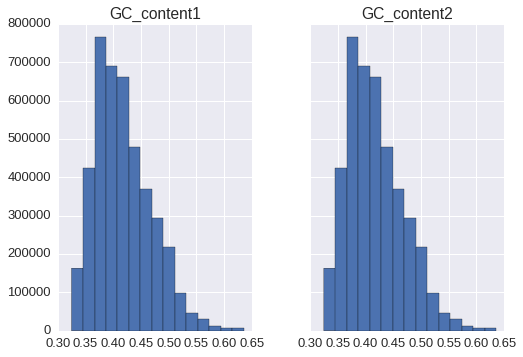

In [277]:
cleanDf.hist(column=['GC_content1','GC_content2'],bins=15,sharey=True);

In [278]:
len(cleanDf.GC_content1)==len(cleanDf.GC_content2)

True

In [279]:
len(GC_hist)

8449424

# All gc contents revealed

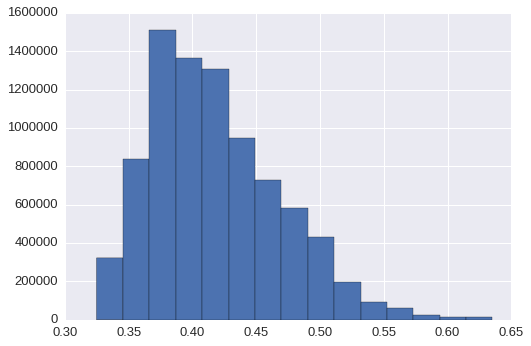

In [280]:
GC_hist.hist(bins=15);

In [281]:
GC_hist.head()

0    0.61372
1    0.63522
2    0.47190
3    0.56204
4    0.56805
dtype: float64

In [282]:
len(GC_hist)

8449424

In [283]:
pro.sum()

0.99572822952191764

In [284]:
import seaborn as sns
import numpy as np

In [285]:
Matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 3 columns):
GC_content1    625 non-null category
GC_content2    625 non-null category
contactP       625 non-null int64
dtypes: category(2), int64(1)
memory usage: 7.0 KB


In [286]:
result = Matrix.pivot(index='GC_content1', columns='GC_content2', values='contactP')

In [287]:
result

GC_content2,"(0.325, 0.335]","(0.335, 0.346]","(0.346, 0.356]","(0.356, 0.366]","(0.366, 0.377]","(0.377, 0.387]","(0.387, 0.398]","(0.398, 0.408]","(0.408, 0.419]","(0.419, 0.429]",...,"(0.481, 0.491]","(0.491, 0.502]","(0.502, 0.512]","(0.512, 0.523]","(0.523, 0.533]","(0.533, 0.544]","(0.544, 0.554]","(0.554, 0.564]","(0.564, 0.575]","(0.575, 0.585]"
GC_content1,,,,,,,,,,,,,,,,,,,,,
"(0.325, 0.335]",164,867,1094,1810,2493,2723,2306,2491,2182,2152,...,816,697,488,344,197,176,81,67,72,37
"(0.335, 0.346]",867,4182,5492,8812,12232,13317,11344,11962,10644,10366,...,4049,3443,2380,1575,992,817,419,332,381,190
"(0.346, 0.356]",1094,5492,7168,10909,15582,16636,14454,14801,13472,12699,...,5235,4414,3171,2041,1262,987,582,448,578,281
"(0.356, 0.366]",1810,8812,10909,16304,23086,25026,21575,22432,20400,19490,...,8194,6990,4987,3256,2119,1655,932,726,874,445
"(0.366, 0.377]",2493,12232,15582,23086,31812,34427,29780,30892,28219,26886,...,11383,9755,6900,4545,2940,2287,1264,1031,1265,655
"(0.377, 0.387]",2723,13317,16636,25026,34427,37168,32134,33737,30948,29779,...,12884,11003,7806,5213,3394,2676,1483,1238,1441,729
"(0.387, 0.398]",2306,11344,14454,21575,29780,32134,27512,28942,26625,25574,...,11214,9672,6808,4586,3015,2315,1296,1098,1294,672
"(0.398, 0.408]",2491,11962,14801,22432,30892,33737,28942,30262,27959,27025,...,11794,10184,7160,4848,3136,2497,1382,1173,1367,727
"(0.408, 0.419]",2182,10644,13472,20400,28219,30948,26625,27959,25318,24677,...,10890,9471,6657,4485,2978,2312,1293,1101,1283,695


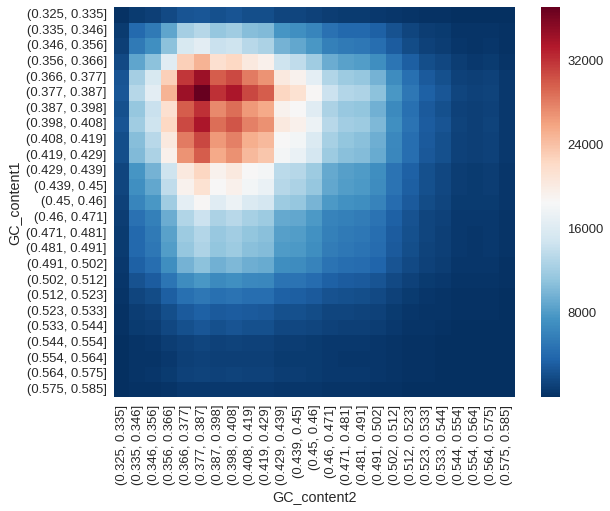

In [288]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
plt.figure(figsize=(9,7))
sns.heatmap(result, annot=False, cmap='RdBu_r');


In [289]:
final.head()

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2
0,"(0.325, 0.335]","(0.325, 0.335]",164,0.006498,0.006498
1,"(0.335, 0.346]","(0.325, 0.335]",867,0.031724,0.006498
2,"(0.346, 0.356]","(0.325, 0.335]",1094,0.040174,0.006498
3,"(0.356, 0.366]","(0.325, 0.335]",1810,0.061401,0.006498
4,"(0.366, 0.377]","(0.325, 0.335]",2493,0.085238,0.006498


In [290]:
from scipy import stats

In [291]:
TOT=final.contactP.sum()

In [292]:
final['survival_func']=final.apply(lambda x: stats.binom.sf(x.contactP,TOT,(x.interval_prob1 *x.interval_prob2)),axis=1)

In [293]:
final['check']=final.apply(lambda x: x.interval_prob1 *x.interval_prob2, axis=1)

In [294]:
final.check.sum()

0.99147470706685303

In [295]:
final.survival_func.mean()

0.39366009460864509

In [296]:
result = final.pivot(index='GC_content1', columns='GC_content2', values='survival_func')

In [297]:
result

GC_content2,"(0.325, 0.335]","(0.335, 0.346]","(0.346, 0.356]","(0.356, 0.366]","(0.366, 0.377]","(0.377, 0.387]","(0.387, 0.398]","(0.398, 0.408]","(0.408, 0.419]","(0.419, 0.429]",...,"(0.481, 0.491]","(0.491, 0.502]","(0.502, 0.512]","(0.512, 0.523]","(0.523, 0.533]","(0.533, 0.544]","(0.544, 0.554]","(0.554, 0.564]","(0.564, 0.575]","(0.575, 0.585]"
GC_content1,,,,,,,,,,,,,,,,,,,,,
"(0.325, 0.335]",0.823774,4.439878e-01,4.861768e-01,3.853956e-04,1.858023e-04,3.523430e-04,1.579035e-02,1.357014e-04,0.096073,0.009478,...,9.984948e-01,9.990754e-01,0.996272,9.330875e-01,9.993021e-01,0.857226,0.994099,0.995052,0.999478,0.994440
"(0.335, 0.346]",0.443988,6.940881e-01,1.771699e-02,4.377124e-13,1.957585e-17,7.902577e-15,1.412628e-08,2.827311e-10,0.002714,0.000077,...,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,0.999947,0.999998,1.000000,1.000000,1.000000
"(0.346, 0.356]",0.486177,1.771699e-02,4.256597e-07,8.721818e-09,7.915328e-25,3.366660e-12,1.332684e-12,1.932823e-05,0.001078,0.317562,...,9.999992e-01,1.000000e+00,0.999967,1.000000e+00,1.000000e+00,1.000000,0.998770,1.000000,0.995965,0.999675
"(0.356, 0.366]",0.000385,4.377124e-13,8.721818e-09,2.383986e-05,2.727511e-15,1.397263e-09,1.524332e-07,6.793299e-05,0.007063,0.121745,...,9.999341e-01,9.999992e-01,0.998415,9.999980e-01,9.999923e-01,0.999848,0.991150,0.999999,0.999840,0.999778
"(0.366, 0.377]",0.000186,1.957585e-17,7.915328e-25,2.727511e-15,1.644254e-15,5.716631e-08,2.313315e-07,1.040717e-03,0.010972,0.369536,...,9.999954e-01,9.999999e-01,0.999913,9.999998e-01,9.999999e-01,0.999996,0.999854,0.999999,0.997464,0.996587
"(0.377, 0.387]",0.000352,7.902577e-15,3.366660e-12,1.397263e-09,5.716631e-08,2.154138e-02,2.856434e-02,2.280283e-02,0.024216,0.050538,...,9.158662e-01,9.969260e-01,0.924706,9.896213e-01,9.952827e-01,0.939636,0.913679,0.982545,0.947040,0.994019
"(0.387, 0.398]",0.015790,1.412628e-08,1.332684e-12,1.524332e-07,2.313315e-07,2.856434e-02,4.367053e-01,2.915064e-01,0.147658,0.320083,...,7.114507e-01,8.188760e-01,0.727909,8.344410e-01,8.245879e-01,0.920025,0.809777,0.868778,0.559601,0.761492
"(0.398, 0.408]",0.000136,2.827311e-10,1.932823e-05,6.793299e-05,1.040717e-03,2.280283e-02,2.915064e-01,5.413631e-01,0.124570,0.055296,...,6.377638e-01,7.303701e-01,0.674569,6.914705e-01,9.283217e-01,0.535922,0.623471,0.708607,0.466430,0.468912
"(0.408, 0.419]",0.096073,2.714019e-03,1.077896e-03,7.062631e-03,1.097193e-02,2.421552e-02,1.476584e-01,1.245704e-01,0.819602,0.196548,...,3.518042e-01,2.188633e-01,0.245372,4.562835e-01,3.131372e-01,0.352774,0.337962,0.404039,0.181279,0.121735


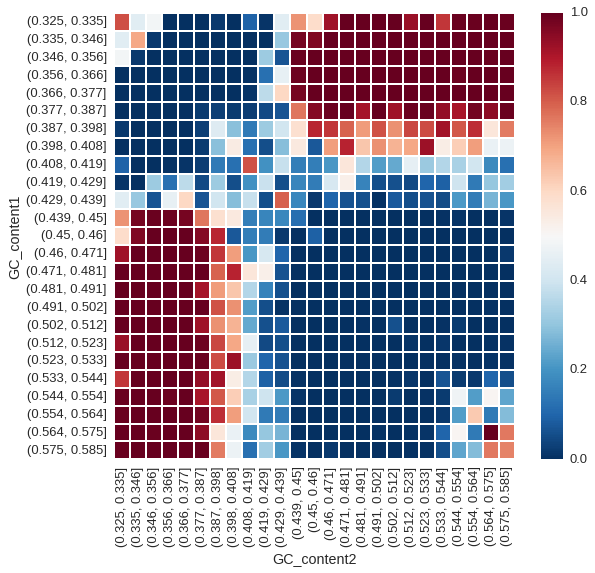

In [300]:
sns.set(font_scale=1.3)
plt.figure(figsize=(9,8))
sns.heatmap(result, annot=False, cmap='RdBu_r',linewidths=1,vmax=1,vmin=0);

In [301]:
final['p_val']=final.apply(lambda x: np.log(x.survival_func), axis=1)
final['p_val_neg']=final.apply(lambda x: np.log(1- x.survival_func), axis=1)

In [309]:
def strange(couple):
    if abs(couple[0])>abs(couple[1]):
        return -couple[0]
    else:
        return couple[1]

In [311]:
final['def_p_val']=final.apply(lambda x: strange([x.p_val,x.p_val_neg]),axis=1)

In [312]:
final

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2,survival_func,check,p_val,p_val_neg,def_p_val
0,"(0.325, 0.335]","(0.325, 0.335]",164,0.006498,0.006498,8.237744e-01,0.000042,-1.938586e-01,-1.735990e+00,-1.735990
1,"(0.335, 0.346]","(0.325, 0.335]",867,0.031724,0.006498,4.439878e-01,0.000206,-8.119582e-01,-5.869651e-01,0.811958
2,"(0.346, 0.356]","(0.325, 0.335]",1094,0.040174,0.006498,4.861768e-01,0.000261,-7.211830e-01,-6.658760e-01,0.721183
3,"(0.356, 0.366]","(0.325, 0.335]",1810,0.061401,0.006498,3.853956e-04,0.000399,-7.861240e+00,-3.854698e-04,7.861240
4,"(0.366, 0.377]","(0.325, 0.335]",2493,0.085238,0.006498,1.858023e-04,0.000554,-8.590827e+00,-1.858196e-04,8.590827
5,"(0.377, 0.387]","(0.325, 0.335]",2723,0.093708,0.006498,3.523430e-04,0.000609,-7.950905e+00,-3.524051e-04,7.950905
6,"(0.387, 0.398]","(0.325, 0.335]",2306,0.081006,0.006498,1.579035e-02,0.000526,-4.148356e+00,-1.591635e-02,4.148356
7,"(0.398, 0.408]","(0.325, 0.335]",2491,0.085024,0.006498,1.357014e-04,0.000553,-8.905053e+00,-1.357107e-04,8.905053
8,"(0.408, 0.419]","(0.325, 0.335]",2182,0.077969,0.006498,9.607272e-02,0.000507,-2.342650e+00,-1.010064e-01,2.342650
9,"(0.419, 0.429]","(0.325, 0.335]",2152,0.075153,0.006498,9.477740e-03,0.000488,-4.658809e+00,-9.522940e-03,4.658809


In [313]:
result_pval = final.pivot(index='GC_content1', columns='GC_content2', values='def_p_val')

In [314]:
result_pval

GC_content2,"(0.325, 0.335]","(0.335, 0.346]","(0.346, 0.356]","(0.356, 0.366]","(0.366, 0.377]","(0.377, 0.387]","(0.387, 0.398]","(0.398, 0.408]","(0.408, 0.419]","(0.419, 0.429]",...,"(0.481, 0.491]","(0.491, 0.502]","(0.502, 0.512]","(0.512, 0.523]","(0.523, 0.533]","(0.533, 0.544]","(0.544, 0.554]","(0.554, 0.564]","(0.564, 0.575]","(0.575, 0.585]"
GC_content1,,,,,,,,,,,,,,,,,,,,,
"(0.325, 0.335]",-1.735990,0.811958,0.721183,7.861240,8.590827,7.950905,4.148356,8.905053,2.342650,4.658809,...,-6.498801,-6.986168,-5.592001,-2.704369,-7.267462,-1.946489,-5.132552,-5.308825,-7.557843,-5.192095
"(0.335, 0.346]",0.811958,-1.184458,4.033231,28.457214,38.472235,32.471588,18.075229,21.986525,5.909325,9.474338,...,-18.240102,-22.287822,-20.809972,-20.206515,-22.021401,-9.850814,-12.906163,-18.213799,-20.213183,-15.808815
"(0.346, 0.356]",0.721183,4.033231,14.669626,18.557438,55.495826,26.417100,27.343826,10.853944,6.832745,1.147084,...,-14.082208,-22.188559,-10.308803,-18.619258,-26.185582,-19.688602,-6.701112,-15.157108,-5.512709,-8.031792
"(0.356, 0.366]",7.861240,28.457214,18.557438,10.644151,33.535387,20.388750,15.696539,9.596989,4.952938,2.105824,...,-9.627497,-14.069814,-6.446924,-13.111244,-11.769564,-8.791046,-4.727366,-13.621524,-8.739297,-8.412597
"(0.366, 0.377]",8.590827,38.472235,55.495826,33.535387,34.041490,16.677301,15.279414,6.867845,4.512415,0.995508,...,-12.284227,-15.844755,-9.355117,-15.423149,-15.729908,-12.483917,-8.834859,-14.329475,-5.977029,-5.680051
"(0.377, 0.387]",7.950905,32.471588,26.417100,20.388750,16.677301,3.837780,3.555596,3.780871,3.720762,2.985034,...,-2.475347,-5.784765,-2.586354,-4.568003,-5.356526,-2.807364,-2.449679,-4.048137,-2.938223,-5.119125
"(0.387, 0.398]",4.148356,18.075229,27.343826,15.696539,15.279414,3.555596,0.828497,1.232693,1.912854,1.139176,...,-1.242889,-1.708573,-1.301619,-1.798427,-1.740617,-2.526038,-1.659557,-2.030864,-0.820075,-1.433352
"(0.398, 0.408]",8.905053,21.986525,10.853944,9.596989,6.867845,3.780871,1.232693,-0.779497,2.082884,2.895062,...,-1.015459,-1.310705,-1.122606,-1.175938,-2.635568,-0.767703,-0.976760,-1.233082,0.762646,0.757341
"(0.408, 0.419]",2.342650,5.909325,6.832745,4.952938,4.512415,3.720762,1.912854,2.082884,-1.712592,1.626848,...,1.044681,1.519308,1.404979,0.784641,1.161114,1.041927,1.084821,0.906243,1.707720,2.105905


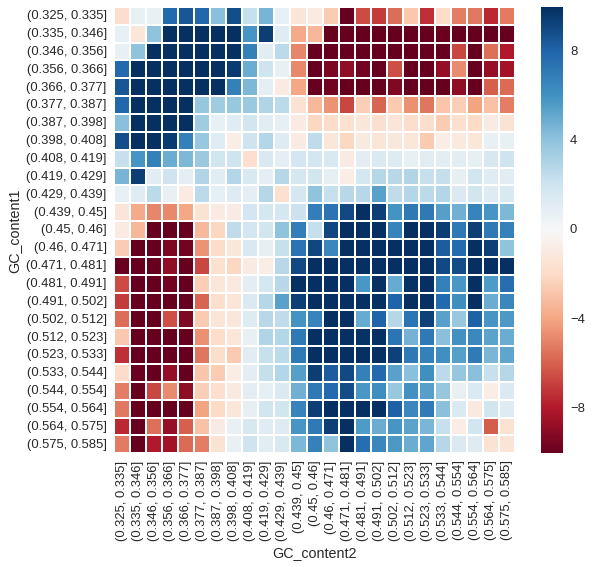

In [319]:
sns.set(font_scale=1.3)
plt.figure(figsize=(9,8))
sns.heatmap(result_pval, annot=False, cmap='RdBu',linewidths=1,vmax=10,vmin=-10);

In [320]:
final

,GC_content1,GC_content2,contactP,interval_prob1,interval_prob2,survival_func,check,p_val,p_val_neg,def_p_val
0,"(0.325, 0.335]","(0.325, 0.335]",164,0.006498,0.006498,8.237744e-01,0.000042,-1.938586e-01,-1.735990e+00,-1.735990
1,"(0.335, 0.346]","(0.325, 0.335]",867,0.031724,0.006498,4.439878e-01,0.000206,-8.119582e-01,-5.869651e-01,0.811958
2,"(0.346, 0.356]","(0.325, 0.335]",1094,0.040174,0.006498,4.861768e-01,0.000261,-7.211830e-01,-6.658760e-01,0.721183
3,"(0.356, 0.366]","(0.325, 0.335]",1810,0.061401,0.006498,3.853956e-04,0.000399,-7.861240e+00,-3.854698e-04,7.861240
4,"(0.366, 0.377]","(0.325, 0.335]",2493,0.085238,0.006498,1.858023e-04,0.000554,-8.590827e+00,-1.858196e-04,8.590827
5,"(0.377, 0.387]","(0.325, 0.335]",2723,0.093708,0.006498,3.523430e-04,0.000609,-7.950905e+00,-3.524051e-04,7.950905
6,"(0.387, 0.398]","(0.325, 0.335]",2306,0.081006,0.006498,1.579035e-02,0.000526,-4.148356e+00,-1.591635e-02,4.148356
7,"(0.398, 0.408]","(0.325, 0.335]",2491,0.085024,0.006498,1.357014e-04,0.000553,-8.905053e+00,-1.357107e-04,8.905053
8,"(0.408, 0.419]","(0.325, 0.335]",2182,0.077969,0.006498,9.607272e-02,0.000507,-2.342650e+00,-1.010064e-01,2.342650
9,"(0.419, 0.429]","(0.325, 0.335]",2152,0.075153,0.006498,9.477740e-03,0.000488,-4.658809e+00,-9.522940e-03,4.658809
